PS2 : Predict the house price 
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression 
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [2]:
#loading the dataset

df = pd.read_csv("House_Rent_Dataset.csv")

In [3]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
df.shape

(4746, 12)

1.Pre-process the dataset.

In [6]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


In [8]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [9]:
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

2. Identify outliers.
OUTLIER: An object that deviates significantly from the rest of the objects.

C:\Users\Admin\AppData\Local\Temp\ipykernel_13432\1702960003.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rent'])


<AxesSubplot: xlabel='Rent', ylabel='Density'>

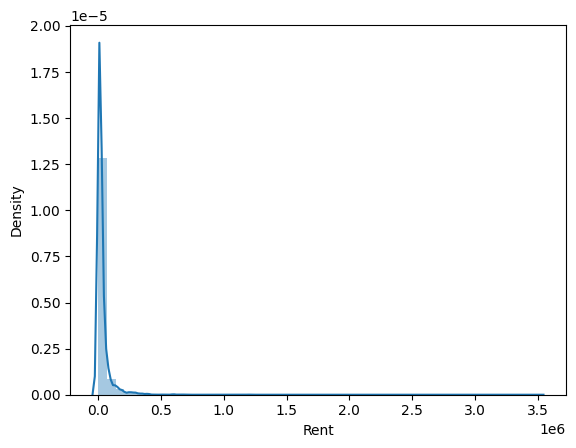

In [10]:
# data visualization
# plotting distribution plot

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.distplot(df['Rent'])                                         
#Seaborn Distplot represents the overall distribution of continuous data variables.The Distplot depicts the data by a histogram and a line in combination to it.

C:\Users\Admin\AppData\Local\Temp\ipykernel_13432\4191602867.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BHK'])


<AxesSubplot: xlabel='BHK', ylabel='Density'>

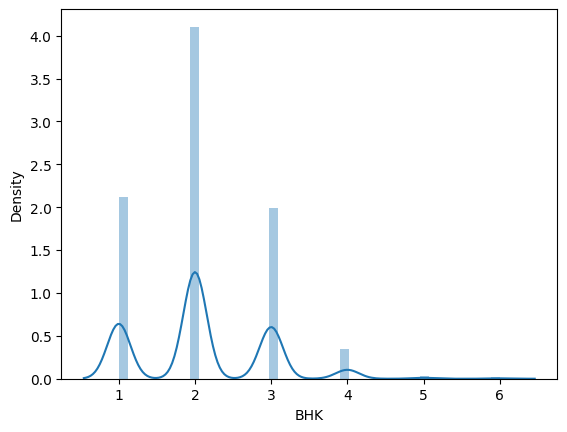

In [11]:
sns.distplot(df['BHK'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_13432\187259630.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Size'])


<AxesSubplot: xlabel='Size', ylabel='Density'>

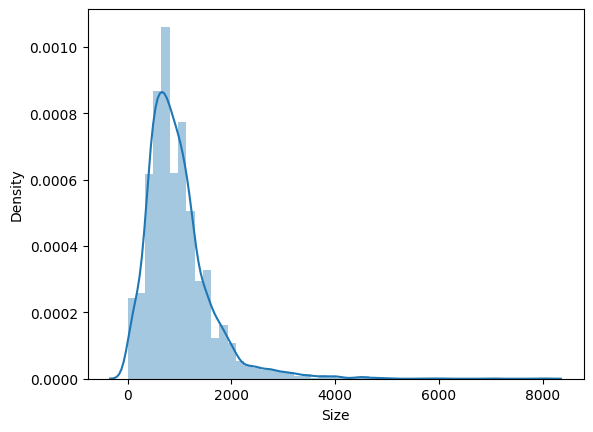

In [12]:
sns.distplot(df['Size'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_13432\670888697.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bathroom'])


<AxesSubplot: xlabel='Bathroom', ylabel='Density'>

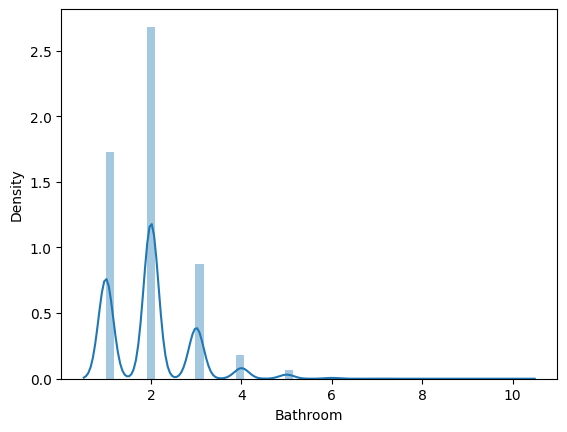

In [13]:
sns.distplot(df['Bathroom'])

In [14]:
#creating a function to identify outliers

def find_outliers_IQR(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [15]:
#getting outlier details for column "Rent" using the above function

outliers = find_outliers_IQR(df["Rent"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 520
max outlier value: 3500000
min outlier value: 68000


104     180000
525      70000
527      75000
530     160000
531     300000
         ...  
4523     70000
4543    200000
4648     80000
4669    140000
4716    110000
Name: Rent, Length: 520, dtype: int64

In [16]:
#you can also pass two columns as argument to the function (here "Size" and "Rent")

outliers = find_outliers_IQR(df[["Size","Rent"]])
outliers

,Size,Rent
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
4741,NaN,NaN
4742,NaN,NaN
4743,NaN,NaN
4744,NaN,NaN


In [17]:
#upper and lower limit which can be used for capping of outliers

upper_limit = df['Rent'].mean() + 3*df['Rent'].std()
print(upper_limit)
lower_limit = df['Rent'].mean() - 3*df['Rent'].std()
print(lower_limit)

269312.69013947854
-199325.78748461127


3. Check the correlation.

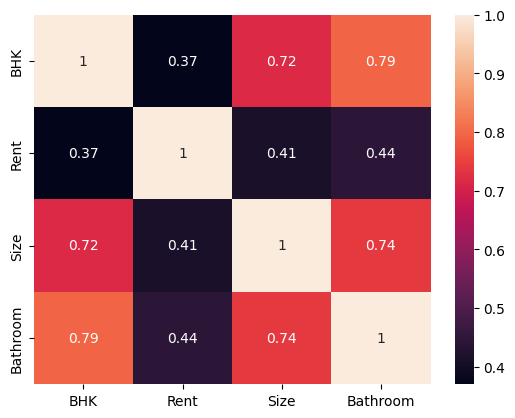

In [18]:
#creating a correlation matrix
#A heatmap contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent 
#higher values than the lighter shade.

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<AxesSubplot: xlabel='BHK', ylabel='Rent'>

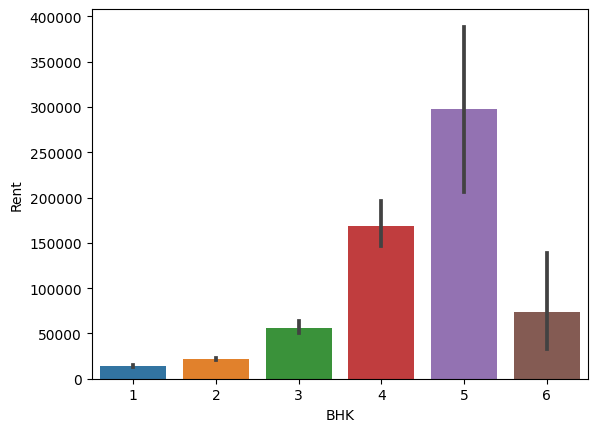

In [19]:
sns.barplot(x = df['BHK'], y = df['Rent'], data = df)

In [20]:
mean_rent=df.groupby('BHK')['Rent'].mean().sort_values()
print(mean_rent)

BHK
1     14139.223650
2     22113.864018
3     55863.062842
6     73125.000000
4    168864.555556
5    297500.000000
Name: Rent, dtype: float64


<AxesSubplot: xlabel='BHK', ylabel='Size'>

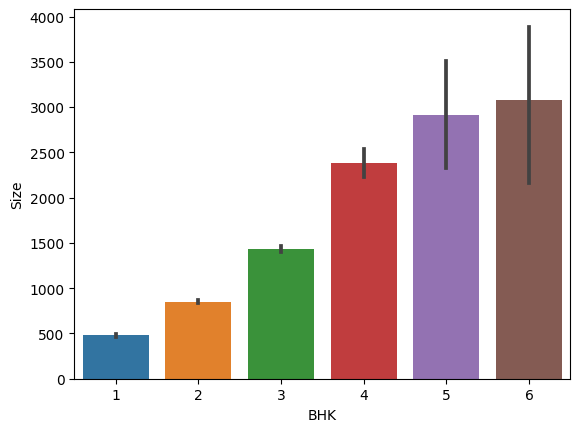

In [21]:
#It looks like houses that have 4 or 5 rooms are higher rent prices than 6. 6 bedroom houses can be out of the city or not big as 4 and 5 bedroom houses.

sns.barplot(x = df['BHK'], y = df['Size'], data = df)

In [22]:
mean_size=df.groupby('BHK')['Size'].mean().sort_values()
print(mean_size)

BHK
1     478.907455
2     852.072848
3    1432.367031
4    2382.190476
5    2910.947368
6    3075.000000
Name: Size, dtype: float64


<AxesSubplot: >

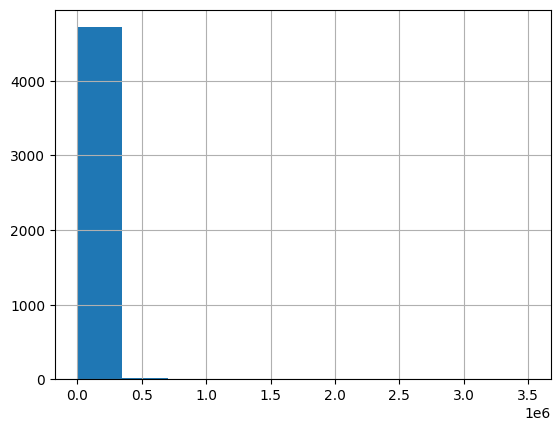

In [23]:
df['Rent'].hist()

<AxesSubplot: xlabel='Rent'>

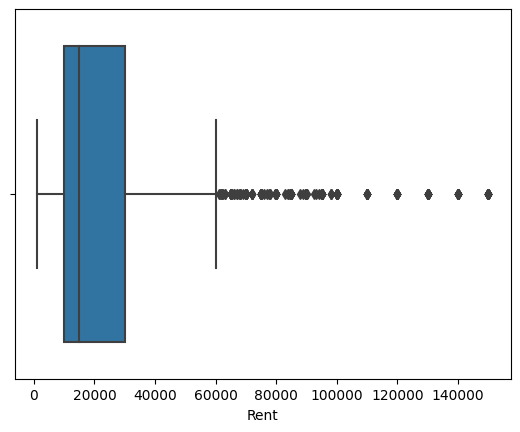

In [24]:
#right skewed distribution

sns.boxplot(x = df['Rent'][df['Rent'] <= 150000])

In [25]:
#so the avg. of rent is between 10k to 30k.
#lets find the mean of the rent for every cities.

meancities = df.groupby('City')['Rent'].mean().sort_values()
print(meancities)

City
Kolkata      11645.173664
Hyderabad    20555.048387
Chennai      21614.092031
Bangalore    24966.365688
Delhi        29461.983471
Mumbai       85321.204733
Name: Rent, dtype: float64


<AxesSubplot: xlabel='City'>

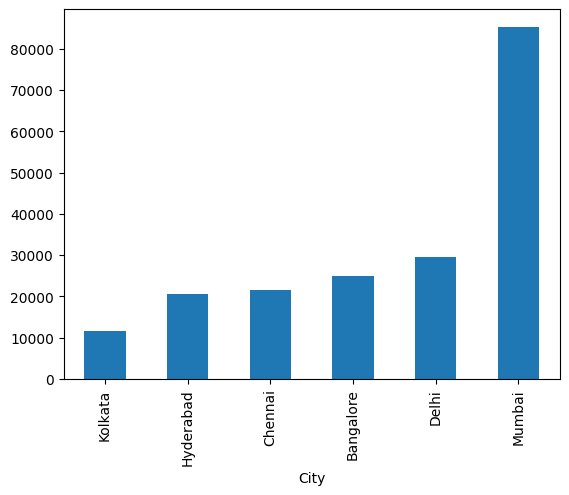

In [26]:
meancities.plot(kind="bar")

In [27]:
#now its time to delete some "unnecessary columns". there is nothing to do with "posted on" and "area locality" columns.

df.drop(["Posted On"], axis="columns", inplace=True)
df.drop(["Area Locality"], axis="columns", inplace=True)

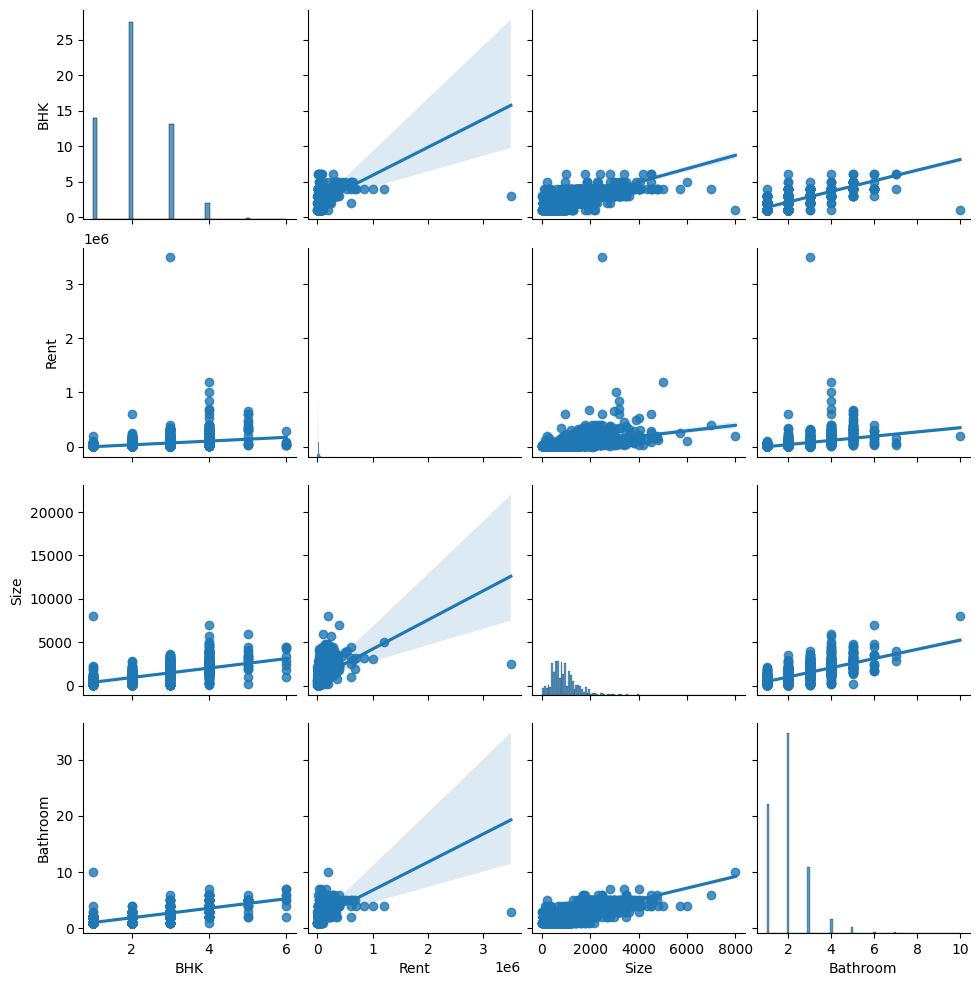

In [28]:
sns.pairplot(df, kind="reg")

In [29]:
df.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [30]:
#now we will change our categorical values to numerical so it will be more clear to read data. "floor" column needs to change as "floor number" and "total floor" so 
#instead of "3 out of 5" we will see 3 as a floor, 5 as a total floor.

df["Floor"].describe()

count           4746
unique           480
top       1 out of 2
freq             379
Name: Floor, dtype: object

In [31]:
print(df["Floor"])

0       Ground out of 2
1            1 out of 3
2            1 out of 3
3            1 out of 2
4            1 out of 2
             ...       
4741         3 out of 5
4742         1 out of 4
4743         3 out of 5
4744       23 out of 34
4745         4 out of 5
Name: Floor, Length: 4746, dtype: object


In [32]:
df["Floor Number"]=df["Floor"].apply(lambda x:str(x).split()[0])
df["Total Floor"]=df["Floor"].apply(lambda x:str(x).split()[-1])
del df["Floor"]

# Change ground to 0

df["Floor Number"] = df["Floor Number"].replace(['Ground'],0)
df["Floor Number"].value_counts()

1        1161
2         945
0         927
3         512
4         272
5         164
6          93
7          74
10         67
8          66
9          65
12         47
11         43
15         41
14         34
18         26
Upper      23
17         22
16         21
19         16
13         15
20         12
25         12
Lower      11
23          9
24          6
21          6
30          5
34          4
28          4
35          3
65          3
22          3
26          3
32          3
60          3
27          3
40          2
53          2
45          2
36          2
48          2
29          1
49          1
50          1
39          1
46          1
41          1
44          1
33          1
37          1
47          1
43          1
76          1
Name: Floor Number, dtype: int64

In [33]:
# Lower basement means "-2",and Upper basement is -1.

df["Floor Number"] = df["Floor Number"].replace(['Lower'],-2)
df["Floor Number"] = df["Floor Number"].replace(['Upper'],-1)
df["Floor Number"] = df["Floor Number"].replace(['Ground'],0)

df.sample(5)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floor
3668,2,18000,900,Carpet Area,Chennai,Semi-Furnished,Family,2,Contact Agent,1,4
374,3,15000,1300,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner,0,3
3730,3,16000,1300,Super Area,Chennai,Furnished,Bachelors/Family,2,Contact Owner,1,2
1342,1,21000,385,Super Area,Mumbai,Unfurnished,Bachelors/Family,1,Contact Owner,0,5
2961,3,40000,180,Carpet Area,Delhi,Unfurnished,Bachelors,3,Contact Agent,0,4


In [34]:
df["Total Floor"].value_counts()

4         938
3         915
2         868
5         422
1         335
         ... 
39          1
62          1
59          1
66          1
Ground      1
Name: Total Floor, Length: 67, dtype: int64

In [35]:
df["Total Floor"] = df["Total Floor"].replace(['Ground'],1)

In [36]:
df["Area Type"].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

<AxesSubplot: xlabel='Area Type'>

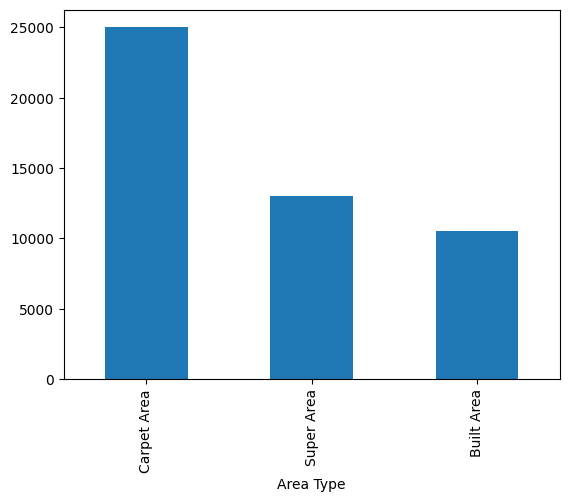

In [37]:
df.groupby('Area Type')['Rent'].median().sort_values(ascending=False).plot(kind='bar')

In [38]:
# We have 3 values in the "Area Type" column. From now on Super Area =0, Carpet Area= 1, Built Area =2.

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column "Area Type".
df["Area Type"]= label_encoder.fit_transform(df["Area Type"])
  
df["Area Type"].unique()

array([2, 1, 0])

In [39]:
df["Furnishing Status"].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

<AxesSubplot: xlabel='Furnishing Status'>

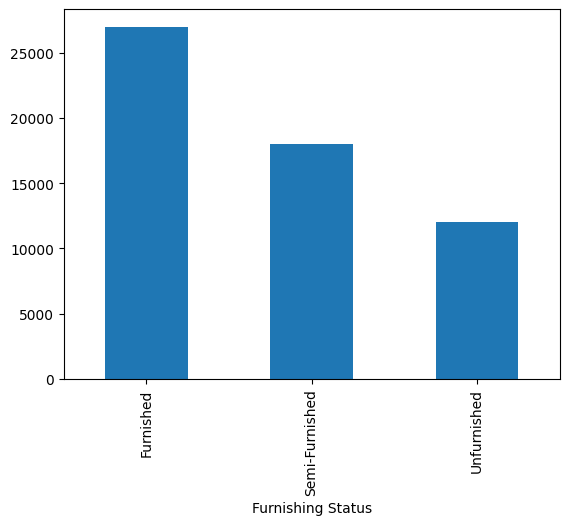

In [40]:
df.groupby('Furnishing Status')['Rent'].median().sort_values(ascending=False).plot(kind='bar')

In [41]:
# We have 3 values in the "Furnishing Status" column. From now on Unfurnished =0, Semi-Furnished= 1, Furnished =2.

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column "Area Type".
df["Furnishing Status"]= label_encoder.fit_transform(df["Furnishing Status"])
  
df["Furnishing Status"].unique()

array([2, 1, 0])

In [42]:
df["Tenant Preferred"].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

<AxesSubplot: xlabel='Tenant Preferred'>

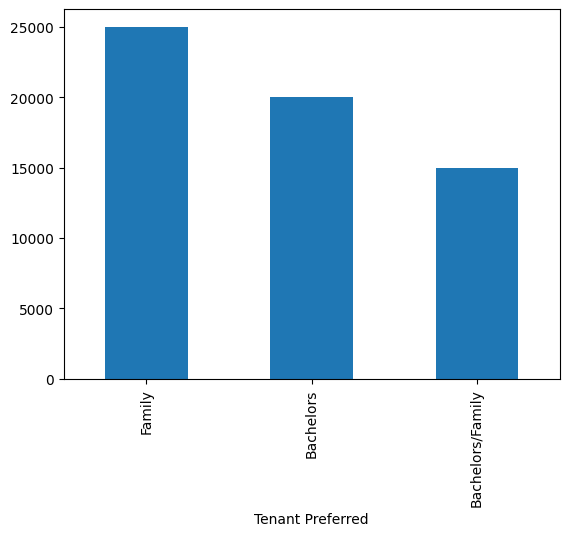

In [43]:
df.groupby("Tenant Preferred")['Rent'].median().sort_values(ascending=False).plot(kind='bar')

In [44]:
# # We have 3 values in the "Tenant Preferred" column. From now on Bachelors/Family =0, Bachelors= 1, Family =2

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column "Area Type".
df["Tenant Preferred"]= label_encoder.fit_transform(df["Tenant Preferred"])
  
df["Tenant Preferred"].unique()

array([1, 0, 2])

In [45]:
df["Point of Contact"].unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

In [46]:
# We have 3 values in the "Point of Contact" column. From now on 'Contact Owner' =0, Contact Agent= 1, Contact Builder =2.

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column "Area Type".
df["Point of Contact"]= label_encoder.fit_transform(df["Point of Contact"])
  
df["Point of Contact"].unique()

array([2, 0, 1])

In [47]:
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floor
0,2,10000,1100,2,Kolkata,2,1,2,2,0,2
1,2,20000,800,2,Kolkata,1,1,1,2,1,3
2,2,17000,1000,2,Kolkata,1,1,1,2,1,3
3,2,10000,800,2,Kolkata,2,1,1,2,1,2
4,2,7500,850,1,Kolkata,2,0,1,2,1,2


In [48]:
df["City"].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

<AxesSubplot: xlabel='City'>

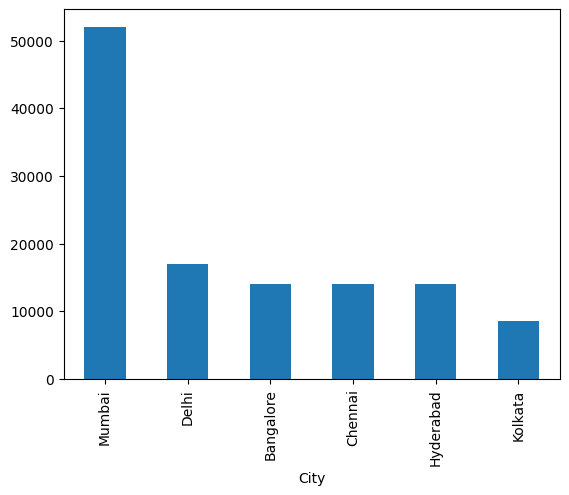

In [49]:
df.groupby("City")['Rent'].median().sort_values(ascending=False).plot(kind='bar')

In [50]:
# # We have 6 cities in the "City" column. From now on 'Kolkata':0,'Mumbai':1,'Bangalore':2,'Delhi':3,'Chennai':4,'Hyderabad':5# We have 6 cities in the "City" column. 
#From now on 'Kolkata':0,'Mumbai':1,'Bangalore':2,'Delhi':3,'Chennai':4,'Hyderabad':5

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column "Area Type".
df['City']= label_encoder.fit_transform(df['City'])
  
df['City'].unique()

array([4, 5, 0, 2, 1, 3])

In [51]:
df.head(20)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floor
0,2,10000,1100,2,4,2,1,2,2,0,2
1,2,20000,800,2,4,1,1,1,2,1,3
2,2,17000,1000,2,4,1,1,1,2,1,3
3,2,10000,800,2,4,2,1,1,2,1,2
4,2,7500,850,1,4,2,0,1,2,1,2
5,2,7000,600,2,4,2,1,2,2,0,1
6,2,10000,700,2,4,2,0,2,0,0,4
7,1,5000,250,2,4,2,0,1,0,1,2
8,2,26000,800,1,4,2,0,2,0,1,2
9,2,10000,1000,1,4,1,1,2,2,1,3


In [52]:
# Our rent value and Size of the houses are so high, it is better to use minmax_scale to change these values from 0 to 1.

#min-max scale
from sklearn.preprocessing import minmax_scale

df["Rent"] = minmax_scale(df["Rent"])

print(df["Rent"])

0       0.002515
1       0.005373
2       0.004516
3       0.002515
4       0.001801
          ...   
4741    0.003944
4742    0.007946
4743    0.009660
4744    0.012519
4745    0.003944
Name: Rent, Length: 4746, dtype: float64


In [53]:
from sklearn.preprocessing import minmax_scale

df["Size"] = minmax_scale(df["Size"])

df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floor
0,2,0.002515,0.136421,2,4,2,1,2,2,0,2
1,2,0.005373,0.098874,2,4,1,1,1,2,1,3
2,2,0.004516,0.123905,2,4,1,1,1,2,1,3
3,2,0.002515,0.098874,2,4,2,1,1,2,1,2
4,2,0.001801,0.105131,1,4,2,0,1,2,1,2


4. Implement linear regression and random forest regression models.
Linear regression is an approach for predicting a response using a single feature.

Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging

5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [54]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
#Importing Models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [55]:
X=df.drop('Rent',axis=1)
y=df['Rent']
# Train-Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [56]:
X_train

array([[-0.10773946, -0.02691966,  0.96785498, ...,  0.68933108,
         0.47503064,  0.12003637],
       [-0.10773946, -0.2631174 ,  0.96785498, ...,  0.68933108,
        -0.06642156, -0.31320164],
       [-1.30009808, -0.66465355,  0.96785498, ...,  0.68933108,
        -0.24690563, -0.42151114],
       ...,
       [-0.10773946, -0.2631174 , -1.02887193, ..., -1.45111945,
         1.7384191 ,  1.0948219 ],
       [ 1.08461915,  3.98844191, -1.02887193, ..., -1.45111945,
        -0.60787376, -0.63813015],
       [-1.30009808, -0.81424545, -1.02887193, ..., -1.45111945,
         0.29454657,  0.01172687]])

In [57]:
X_test

array([[-0.10773946,  0.20927808,  0.96785498, ...,  0.68933108,
        -0.24690563, -0.31320164],
       [-0.10773946, -0.2631174 ,  0.96785498, ...,  0.68933108,
        -0.24690563, -0.42151114],
       [-0.10773946, -0.70716914, -1.02887193, ...,  0.68933108,
         0.29454657,  0.55327439],
       ...,
       [-0.10773946, -0.02691966,  0.96785498, ...,  0.68933108,
        -0.24690563, -0.31320164],
       [ 1.08461915,  0.24864437,  0.96785498, ...,  0.68933108,
        -0.24690563, -0.42151114],
       [-1.30009808, -0.73551287,  0.96785498, ...,  0.68933108,
        -0.24690563, -0.20489213]])

In [58]:
y_train

1995    0.006374
1497    0.002658
2763    0.005087
1351    0.005373
1862    0.004516
          ...   
4426    0.006802
466     0.005373
3092    0.005373
3772    0.023951
860     0.006802
Name: Rent, Length: 3796, dtype: float64

In [59]:
y_test

1566    0.004230
3159    0.003087
538     0.007660
2630    0.001944
4418    0.012804
          ...   
4124    0.004802
3400    0.006802
1941    0.003658
3679    0.007088
2531    0.002801
Name: Rent, Length: 950, dtype: float64

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(3796, 10)
(950, 10)
(950,)
(3796,)


In [61]:
models = { 'Linear' : LinearRegression() }

In [62]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained')

Linear trained


In [63]:
results = {}
kf = KFold(n_splits= 10)

for name, model in models.items():
    result = np.mean(np.sqrt(-cross_val_score(model, X_train, y_train,scoring='neg_mean_squared_error', cv= kf)))
    results[name] = result

In [64]:
for name, result in results.items():
    print(f"{name} : {round(result, 3)}")

Linear : 0.016


In [65]:
results_df = pd.DataFrame(results, index=range(0,1)).T.rename(columns={0: 'RMSE'}).sort_values('RMSE', ascending=False)
results_df.T

,Linear
RMSE,0.016049


Text(0.5, 1.0, 'RMSE of different models')

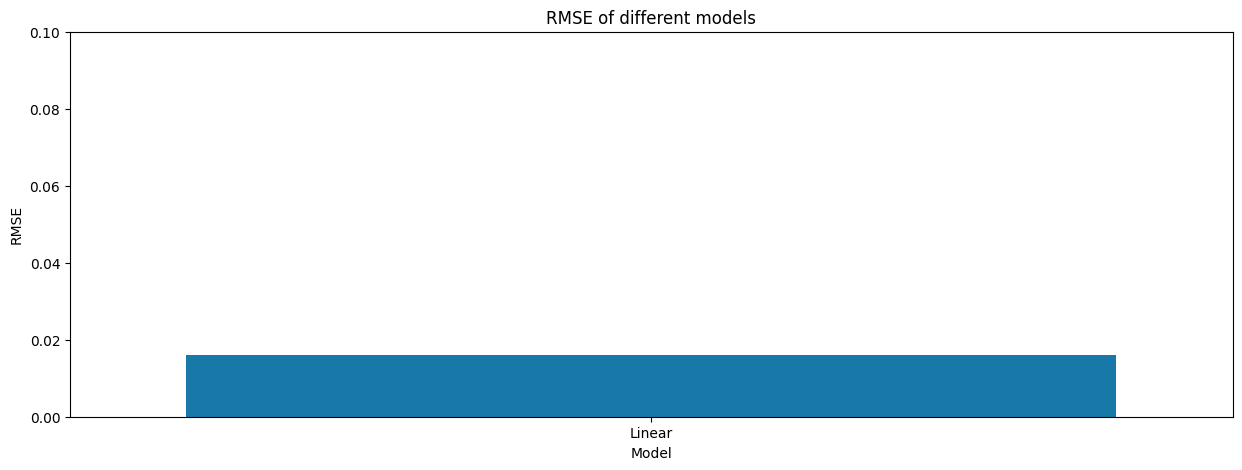

In [66]:
plt.figure(figsize = (15, 5))
sns.barplot(x= results_df.index, y = results_df['RMSE'], palette = 'winter')
plt.ylim(0,0.1)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of different models')

In [67]:
def prediction(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    pred_data=np.exp(model.predict(X_test))
    return r2_score(np.exp(y_test),pred_data)

In [68]:
for name,model in models.items():
    score=prediction(model,X_train,y_train,X_test,y_test)
    print(f'{name} r2_score is {score}')

Linear r2_score is 0.438967089731059
